# The detection of offensive tweets with re-appropriated LGBTQ+ words 

In [1]:
# import relevant libraries 
import pandas as pd
from gensim.models import Word2Vec
import re
import nltk
import numpy as np
import string
import numpy as np
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# display wider extent of pandas dataframe 
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
# import the data set saved as a json file
raw_data = pd.read_json('all_data.json', typ='series')

## Inspecting the data 

This first step is to investigate the dataset and shuffle the tweets so they don't appear in the exact order in which it was downloaded

In [4]:
# number of rows in the data
raw_data.shape

(855554,)

In [5]:
data = raw_data.copy()

In [6]:
# Shuffling the data 
from random import shuffle
shuffle(data)

In [7]:
# convert the data into a data frame 
data = pd.DataFrame((data),columns=['tweets'])
data.head()

,tweets
0,@joehaden23 out here facilitating his teammates greatness.. https://twitter.com/joehaden23/status/1072970973228470272 …
1,A few or these bad boys left from our 11-0 victory today.\nIt’s our highest win and the highest defeat for Newark in 15 years.\n@NonLgeProgspic.twitter.com/WLrmpflJwP
2,Says the LARPER?
3,For some reason @redski_husky keeps calling me a soyboy
4,"Exactly. If I have five non-customers sitting in half of the chairs in my little coffee shop, that's 5 less chairs for actual PAYING customers. Anybody who thinks they have a RIGHT to ""hang out"" in a business without buying anything is nuttier than a fruitcake."


## Data Pre-processing

The data set is cleaned using tokenisation which involves the following steps:
- removal of usernames 
- removal of website links
- applying lowercase to tweets
- removal of all punctuations 

In [8]:
# creating new dataframe
clean_data = data.copy()

In [19]:
# importing custom filters for the gensim 
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_multiple_whitespaces, strip_numeric, strip_tags


In [22]:
def process_tweet (clean_data):
    # remove usernames
    remove_usernames_re = re.compile('@[\w]+')
    clean_data['cleaned_tweets']= clean_data['tweets'].apply(lambda row: remove_usernames_re.sub('',row))
    
    #remove website links 
    remove_urls_re = re.compile('https?:\/\/\S*')
    clean_data['cleaned_tweets'] = clean_data['cleaned_tweets'].apply(lambda tweet: remove_urls_re.sub('', tweet)) 
    
    #define custom filters 
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                  strip_multiple_whitespaces, #remove whitespaces
                  strip_numeric, #remove numbers
                  strip_punctuation #remove punctuation
                  #stem_text #return
                  ]

    #preprocess text using custom filters 
    clean_data['cleaned_tweets'] = clean_data['cleaned_tweets'].apply(lambda row : preprocess_string(row, CUSTOM_FILTERS))
    
    return clean_data


In [23]:
# cleaning data using function created
process_tweet (clean_data)

,tweets,cleaned_tweets
0,@joehaden23 out here facilitating his teammates greatness.. https://twitter.com/joehaden23/status/1072970973228470272 …,"[out, here, facilitating, his, teammates, greatness, …]"
1,A few or these bad boys left from our 11-0 victory today.\nIt’s our highest win and the highest defeat for Newark in 15 years.\n@NonLgeProgspic.twitter.com/WLrmpflJwP,"[a, few, or, these, bad, boys, left, from, our, victory, today, it’s, our, highest, win, and, the, highest, defeat, for, newark, in, years, twitter, com, wlrmpfljwp]"
2,Says the LARPER?,"[says, the, larper]"
3,For some reason @redski_husky keeps calling me a soyboy,"[for, some, reason, keeps, calling, me, a, soyboy]"
4,"Exactly. If I have five non-customers sitting in half of the chairs in my little coffee shop, that's 5 less chairs for actual PAYING customers. Anybody who thinks they have a RIGHT to ""hang out"" in a business without buying anything is nuttier than a fruitcake.","[exactly, if, i, have, five, non, customers, sitting, in, half, of, the, chairs, in, my, little, coffee, shop, that, s, less, chairs, for, actual, paying, customers, anybody, who, thinks, they, have, a, right, to, hang, out, in, a, business, without, buying, anything, is, nuttier, than, a, fruitcake]"
...,...,...
855549,If you're running your cocksucker about Barbara Bush just don't.,"[if, you, re, running, your, cocksucker, about, barbara, bush, just, don, t]"
855550,"I've been seeing a lot of stuff about how a trans person can't date another trans person? Yeah ok Debbie, I'm nonbinary and my partner is genderfluid soooooo does this mean we're mythical creatures lmao, try again hun","[i, ve, been, seeing, a, lot, of, stuff, about, how, a, trans, person, can, t, date, another, trans, person, yeah, ok, debbie, i, m, nonbinary, and, my, partner, is, genderfluid, soooooo, does, this, mean, we, re, mythical, creatures, lmao, try, again, hun]"
855551,Even more convinced you’re a fagget as you use emoji,"[even, more, convinced, you’re, a, fagget, as, you, use, emoji]"
855552,"If this enrages you like it does us, let's do something about. Together @ http://forge.vision https://twitter.com/marcventresca/status/1026695885109874689 …","[if, this, enrages, you, like, it, does, us, let, s, do, something, about, together, …]"


## Word2vec training model

In [ ]:
# training model
model = Word2Vec(clean_data.cleaned_tweets, min_count=5, # Ignore words that appear less than min_count
                            size=300,  # Dimensionality of word embeddings
                            workers=32, # Number of processors (for parallelisation)
                            window=5,  # Context window for words during training
                            iter=30)   # Number of epochs training over corpus)

In [ ]:
# save model  
model.save("w2v_2.model")

In [9]:
model_w2v= Word2Vec.load("w2v_2.model")

/home/louise/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [10]:
model_w2v.similar_by_word("fag", topn=20)

[('faggot', 0.7315710783004761),
 ('faggit', 0.6629757285118103),
 ('fagget', 0.6040633916854858),
 ('fags', 0.5801328420639038),
 ('fagot', 0.5712227821350098),
 ('fagit', 0.5509530305862427),
 ('cunt', 0.5382643938064575),
 ('retard', 0.5370320677757263),
 ('cigarette', 0.532336413860321),
 ('poofter', 0.5321728587150574),
 ('faggots', 0.5062996745109558),
 ('weirdo', 0.4867444634437561),
 ('cig', 0.4853493571281433),
 ('wigger', 0.47585204243659973),
 ('wanker', 0.4757734537124634),
 ('faggo', 0.47524818778038025),
 ('faget', 0.4721674919128418),
 ('fagoot', 0.4714740514755249),
 ('phaggot', 0.46650463342666626),
 ('dweeb', 0.4638848602771759)]

In [11]:
model_w2v.similar_by_word("queer", topn=20)

[('genderqueer', 0.6365623474121094),
 ('trans', 0.5655161142349243),
 ('pansexual', 0.5197595953941345),
 ('lgbtq', 0.5141517519950867),
 ('lesbian', 0.5136266350746155),
 ('gay', 0.5128680467605591),
 ('cis', 0.5110611915588379),
 ('genderfluid', 0.5084371566772461),
 ('binary', 0.4971920847892761),
 ('gnc', 0.49563950300216675),
 ('sapphic', 0.48227494955062866),
 ('femme', 0.4812479317188263),
 ('“queer', 0.47658148407936096),
 ('bi', 0.47117552161216736),
 ('latinx', 0.46843981742858887),
 ('amab', 0.46033385396003723),
 ('polyam', 0.45038533210754395),
 ('nonbinary', 0.4499472379684448),
 ('neurodiverse', 0.44806987047195435),
 ('asexual', 0.4459647238254547)]

## Doc2vec model

In [35]:
# import gensim libraries
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.test.utils import common_texts

In [24]:
# using the preprocessed data
data_doc = clean_data.copy()

In [25]:
# tag documents 
tagged_data = [TaggedDocument(doc, [i]) for i, doc in enumerate(data_doc.cleaned_tweets)]

In [26]:
# display tagged data
tagged_data[:10]

[TaggedDocument(words=['out', 'here', 'facilitating', 'his', 'teammates', 'greatness', '…'], tags=[0]),
 TaggedDocument(words=['a', 'few', 'or', 'these', 'bad', 'boys', 'left', 'from', 'our', 'victory', 'today', 'it’s', 'our', 'highest', 'win', 'and', 'the', 'highest', 'defeat', 'for', 'newark', 'in', 'years', 'twitter', 'com', 'wlrmpfljwp'], tags=[1]),
 TaggedDocument(words=['says', 'the', 'larper'], tags=[2]),
 TaggedDocument(words=['for', 'some', 'reason', 'keeps', 'calling', 'me', 'a', 'soyboy'], tags=[3]),
 TaggedDocument(words=['exactly', 'if', 'i', 'have', 'five', 'non', 'customers', 'sitting', 'in', 'half', 'of', 'the', 'chairs', 'in', 'my', 'little', 'coffee', 'shop', 'that', 's', 'less', 'chairs', 'for', 'actual', 'paying', 'customers', 'anybody', 'who', 'thinks', 'they', 'have', 'a', 'right', 'to', 'hang', 'out', 'in', 'a', 'business', 'without', 'buying', 'anything', 'is', 'nuttier', 'than', 'a', 'fruitcake'], tags=[4]),
 TaggedDocument(words=['hey', 'what', 'a', 'great', '

In [ ]:
%%time 

max_epochs = 50
vec_size = 300
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=5,
                window=5,
                workers=32,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

# Save model 
model.save("d2v_4.model")
print("Model Saved")

In [40]:
# Loading model
model_4 = Doc2Vec.load("d2v_4.model")

/home/louise/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:
# displaying top 20 most similar words 
model_4.most_similar("queer", topn=20)

[('gay', 0.3563622236251831),
 ('homosexual', 0.33605438470840454),
 ('genderqueer', 0.3029128909111023),
 ('bandaged', 0.29243436455726624),
 ('wise', 0.28847604990005493),
 ('japanese', 0.2807754576206207),
 ('horrible', 0.2791999876499176),
 ('minho', 0.2788110077381134),
 ('trannie', 0.2764802575111389),
 ('grown', 0.27632611989974976),
 ('pansexual', 0.27570050954818726),
 ('blind', 0.27137860655784607),
 ('candy', 0.2702086269855499),
 ('neutral', 0.267377644777298),
 ('contact', 0.2670806348323822),
 ('lovely', 0.2652425765991211),
 ('gays', 0.2648411691188812),
 ('masc', 0.2589563727378845),
 ('feminine', 0.25774863362312317),
 ('genderfluid', 0.25558242201805115)]

In [15]:
# displaying top 20 most similar words 
model_4.most_similar("fag", topn=20)

[('faggit', 0.5601431727409363),
 ('faggot', 0.5302890539169312),
 ('fagget', 0.5287405848503113),
 ('fagit', 0.4999343752861023),
 ('retard', 0.4979710578918457),
 ('dweeb', 0.4971749186515808),
 ('jackass', 0.49693095684051514),
 ('dork', 0.4963245391845703),
 ('wigger', 0.4954478144645691),
 ('shitcunt', 0.49298614263534546),
 ('fucktard', 0.4905308485031128),
 ('wanker', 0.4904564619064331),
 ('fags', 0.48574137687683105),
 ('poofter', 0.48540276288986206),
 ('fagot', 0.4794197082519531),
 ('fatass', 0.4752488136291504),
 ('faget', 0.4732345640659332),
 ('cunt', 0.46873655915260315),
 ('douchebag', 0.464285671710968),
 ('shithead', 0.45959609746932983)]

In [41]:
# attempting to find similarly negative tweets 
test_data = word_tokenize("I’m such a fucking dweeb".lower())

#printing out the vector 
v1 = model_4.infer_vector(test_data)
print("V1_infer", v1)

similar_doc = model_4.docvecs.most_similar([v1], topn=10)

for i in range(0,len(similar_doc)):
    print(tagged_data[int(similar_doc[i][0])],similar_doc[i][1])

V1_infer [-0.00191447 -0.05063643 -0.03671208  0.01629547 -0.07043222  0.04369895
  0.02139384 -0.10169639  0.22177693 -0.03448257  0.19274463  0.10812636
  0.03196811 -0.0055989  -0.09058178  0.0229627   0.06945091 -0.21973096
 -0.01046255  0.14405707  0.00105032  0.19830997 -0.23639688  0.16379324
 -0.04128575 -0.00354058 -0.1844017  -0.03781456  0.22599985 -0.14775051
 -0.06843196  0.03563935 -0.15295878  0.11990558  0.13404539 -0.05356326
  0.18155819  0.06540764  0.2777908  -0.11252861 -0.12411314 -0.20961772
 -0.07893997  0.00892069 -0.09648545 -0.07406984  0.19272469  0.03972809
 -0.09585957 -0.36205098 -0.05141452  0.14475375  0.30792242 -0.03988981
 -0.11691719  0.00142459  0.02384388  0.00653065  0.00622575  0.01181409
  0.08007965 -0.05055705 -0.12642404  0.15658736 -0.40015662 -0.03589394
  0.2266979   0.00692158 -0.05609165 -0.24307518 -0.13044402 -0.07055201
 -0.10264213  0.03373726 -0.25459015  0.10801362 -0.13781233 -0.02547451
  0.21875295 -0.0766361   0.04255275 -0.26

In [43]:
test_data = word_tokenize("This is stupid, major no homo".lower())

v1 = model_4.infer_vector(test_data)


similar_doc = model_4.docvecs.most_similar([v1], topn=10)

for i in range(0,len(similar_doc)):
    print(tagged_data[int(similar_doc[i][0])],similar_doc[i][1])

TaggedDocument(['i', 'find', 'it', 'hard', 'to', 'believe', 'someone', 'from', 'gtown', 'never', 'uses', 'scots', 'slang', 'fauxrage'], [234938]) 0.6268226504325867
TaggedDocument(['sms', 'messages', 'from', 'the', 'alleged', 'complainant', 'made', 'public', 'in', 'showed', 'that', 'she', 'did', 'not', 'want', 'to', 'accuse', 'assange', 'of', 'anything', 'that', 'she', 'felt', 'railroaded', 'by', 'police', 'and', 'others', 'around', 'her', 'and', 'police', 'made', 'up', 'the', 'charges'], [21738]) 0.6161360740661621
TaggedDocument(['as', 'for', 'now', 'he', 'is', 'going', 'to', 'win', 'his', 'approval', 'numbers', 'are', 'similar', 'to', 'bush', 'and', 'obama', 'when', 'they', 'were', 're', 'elected', 'the', 'economy', 'is', 'going', 'very', 'well', 'people', 'won', 't', 'see', 'a', 'reason', 'to', 'not', 'relect', 'him'], [491859]) 0.6013360619544983
TaggedDocument(['perfect', 'sunday', 'pic', 'twitter', 'com', 'nfdaxibk'], [228011]) 0.5943712592124939
TaggedDocument(['and', 'sessions

## Visualisations of model in vector space

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 %%time 

max_epochs = 30
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=500,
                window=5,
                workers=32,
                dm=1, #distributed memory
                dbow_words=1 #distributed bag of words)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_viz.model")
print("Model Saved")

In [29]:
# Loading model saved
model = Doc2Vec.load("d2v_viz.model")

/home/louise/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [33]:
def tsne_plot(model):
    #Creates TSNE model and plots it
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    # plot figure
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

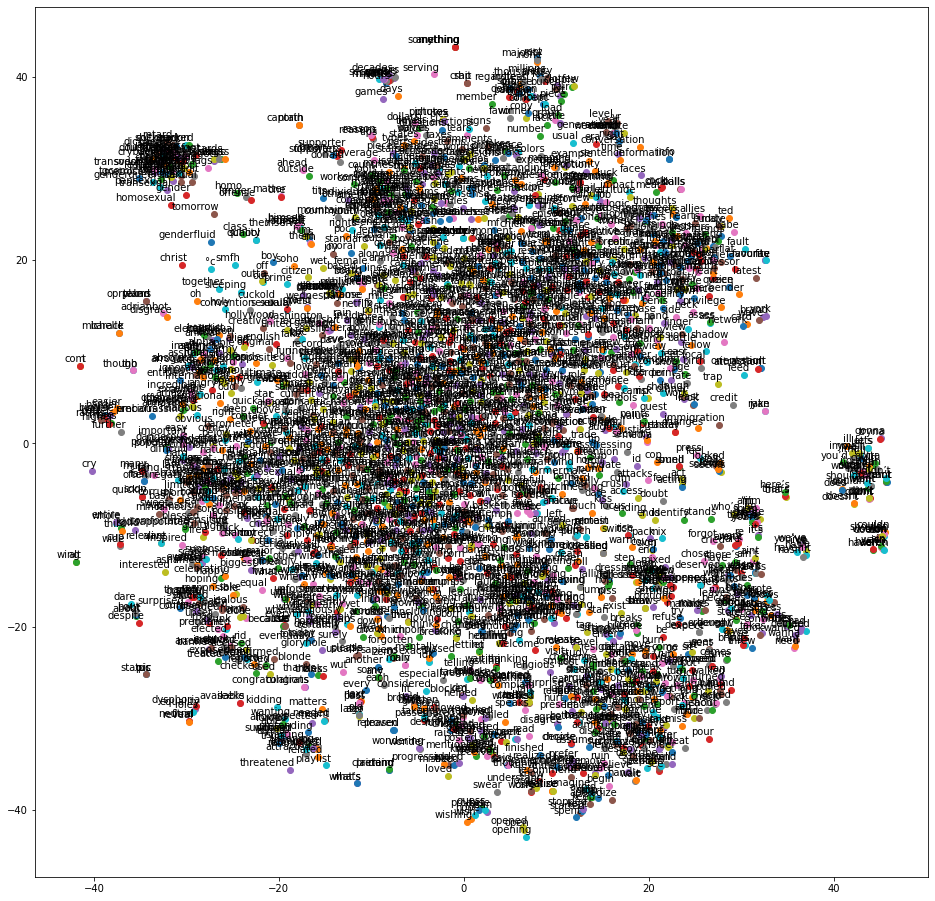

In [34]:
# display plot using function created 
tsne_plot(model)